<a href="https://colab.research.google.com/github/jdmartinezrs/incomesAndBillsProject/blob/main/K_NNMision1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Cargar datos desde Google Drive
sheet_id = '1r4szNXN8abPstdpZEtuePc89H6AJPgjq'
sheet_url = f'https://drive.google.com/uc?id={sheet_id}&export=download'
df = pd.read_csv(sheet_url)

In [10]:

# Limpiar y renombrar columnas
df.columns = df.columns.str.strip()
df = df.rename(columns={
    'Km/ Hr Plan': 'Km_Plan',
    'Ult Km/Hr': 'Ult_Km',
    'Km/Hr Cambio': 'Km_Cambio',
    'Dias Pend': 'Dias_Pend',
    'Tipo de Vehiculo': 'Tipo_Vehiculo',
    'Progreso': 'Progreso',
    'Km/Hr Pend': 'Km_Pend'
})

# Definir características y variable objetivo
features = ['Ult_Km', 'Km_Plan', 'Km_Cambio', 'Dias_Pend', 'Progreso', 'Tipo_Vehiculo']
target = 'Km_Pend'

In [11]:
# Separar X e y
X = df[features]
y = df[target]

In [12]:
# Definir tipos de columnas
numerical_features = ['Ult_Km', 'Km_Plan', 'Km_Cambio', 'Dias_Pend', 'Progreso']
categorical_features = ['Tipo_Vehiculo']

# Preprocesamiento
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])


In [13]:
# Crear modelo de K-NN
model = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=3))
])

# Entrenar modelo
model.fit(X, y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Ult_Km', 'Km_Plan',
                                                   'Km_Cambio', 'Dias_Pend',
                                                   'Progreso']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Tipo_Vehiculo'])])),
                ('regressor', KNeighborsRegressor(n_neighbors=3))])

Escribe el número correspondiente al tipo de vehículo:
1. CARROTANQUE
2. DOBLETROQUE
3. TRACTOCAMION
4. GRUA
5. IRRIGADOR
Tu opción (1-5): 4
Ingrese la cantidad de kilómetros recorridos: 64643

El vehículo tipo 'GRUA' tiene aproximadamente 5247.67 Km restantes antes del próximo mantenimiento.


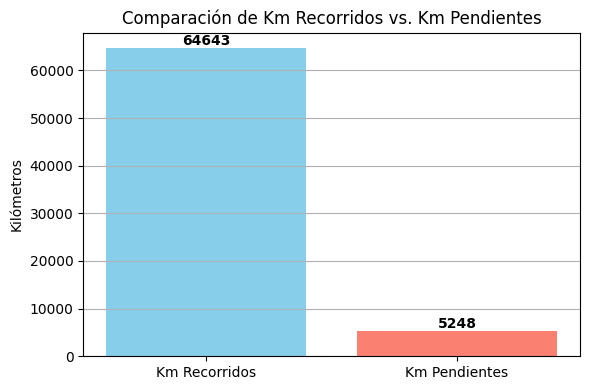

In [18]:
# === INTERFAZ DE USUARIO SIMPLIFICADA PARA PREDICCIÓN ===

# Lista de tipos de vehículos
tipos_vehiculo = ['CARROTANQUE', 'DOBLETROQUE', 'TRACTOCAMION', 'GRUA', 'IRRIGADOR']

# Mostrar opciones
print("Escribe el número correspondiente al tipo de vehículo:")
for i, tipo in enumerate(tipos_vehiculo, start=1):
    print(f"{i}. {tipo}")

# Solicitar opción
while True:
    opcion = input("Tu opción (1-5): ")
    if opcion.isdigit() and 1 <= int(opcion) <= len(tipos_vehiculo):
        tipo_vehiculo = tipos_vehiculo[int(opcion) - 1]
        break
    else:
        print("Por favor, ingresa un número válido entre 1 y 5.")

# Pedir kilómetros recorridos
while True:
    try:
        km_recorridos = float(input("Ingrese la cantidad de kilómetros recorridos: "))
        break
    except ValueError:
        print("Por favor, ingrese un número válido para los kilómetros.")

# Preparar datos para predicción
input_data = pd.DataFrame([{
    'Ult_Km': km_recorridos,
    'Km_Plan': df['Km_Plan'].mean(),
    'Km_Cambio': df['Km_Cambio'].mean(),
    'Dias_Pend': df['Dias_Pend'].mean(),
    'Progreso': df['Progreso'].mean(),
    'Tipo_Vehiculo': tipo_vehiculo
}])

# Realizar predicción
pred = model.predict(input_data)[0]
print(f"\nEl vehículo tipo '{tipo_vehiculo}' tiene aproximadamente {pred:.2f} Km restantes antes del próximo mantenimiento.")

# Visualización de la predicción
labels = ['Km Recorridos', 'Km Pendientes']
values = [km_recorridos, pred]

plt.figure(figsize=(6, 4))
plt.bar(labels, values, color=['skyblue', 'salmon'])
plt.title('Comparación de Km Recorridos vs. Km Pendientes')
plt.ylabel('Kilómetros')
plt.grid(axis='y')

for i, v in enumerate(values):
    plt.text(i, v + max(values)*0.01, f'{v:.0f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()
